In [326]:
pip install numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [327]:
pip install matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [328]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [329]:
import pandas as pd

In [330]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
import geopy
from geopy.distance import distance

In [331]:
import warnings
warnings.filterwarnings('ignore')

In [332]:
train=pd.read_csv('train.csv')

# Data exploration

In [333]:
train

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
0,10461,60000,True,Buono stato / Abitabile,1980.0,41.901300,12.700000,175.00,30.0,2.0,NaN,1.0,NaN,3.0,1.0,1.00000,35.0
1,51304,900000,NaN,Buono stato / Abitabile,NaN,41.907017,12.481311,NaN,NaN,3.0,NaN,1.0,1.0,NaN,3.0,1.00000,131.0
2,33032,33000,NaN,Buono stato / Abitabile,1960.0,41.976500,12.440500,204.20,30.0,4.0,NaN,1.0,NaN,4.0,1.0,1.00000,16.0
3,62281,166000,NaN,Ottimo / Ristrutturato,NaN,45.484800,12.198200,175.00,NaN,1.0,True,1.0,NaN,1.0,2.0,0.99205,100.0
4,45681,410000,True,Buono stato / Abitabile,NaN,45.424480,12.328622,65.91,NaN,3.0,NaN,2.0,1.0,NaN,3.0,1.00000,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46307,33085,329999,True,Buono stato / Abitabile,1929.0,41.923500,12.446100,175.00,35.0,3.0,NaN,1.0,NaN,4.0,3.0,1.00000,88.0
46308,17403,599000,True,Da ristrutturare,1920.0,41.916743,12.454925,NaN,170.0,6.0,NaN,2.0,1.0,NaN,5.0,1.00000,189.0
46309,33332,549000,True,Buono stato / Abitabile,NaN,45.454701,9.242711,NaN,NaN,NaN,NaN,2.0,1.0,NaN,3.0,1.00000,140.0
46310,63367,189000,True,Buono stato / Abitabile,1965.0,45.445605,9.245942,NaN,150.0,-1.0,True,1.0,1.0,NaN,3.0,1.00000,70.0


In [334]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46312 entries, 0 to 46311
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   46312 non-null  int64  
 1   price                46312 non-null  int64  
 2   balcony              30869 non-null  object 
 3   conditions           45083 non-null  object 
 4   construction_year    32366 non-null  float64
 5   latitude             46299 non-null  float64
 6   longitude            46299 non-null  float64
 7   energy_efficiency    26409 non-null  float64
 8   expenses             30158 non-null  float64
 9   floor                44281 non-null  float64
 10  garden               14783 non-null  object 
 11  n_bathrooms          43896 non-null  float64
 12  elevator             28869 non-null  float64
 13  total_floors         27963 non-null  float64
 14  n_rooms              45959 non-null  float64
 15  proximity_to_center  46299 non-null 

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'construction_year'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'energy_efficiency'}>,
        <AxesSubplot:title={'center':'expenses'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'n_bathrooms'}>,
        <AxesSubplot:title={'center':'elevator'}>,
        <AxesSubplot:title={'center':'total_floors'}>,
        <AxesSubplot:title={'center':'n_rooms'}>],
       [<AxesSubplot:title={'center':'proximity_to_center'}>,
        <AxesSubplot:title={'center':'surface'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

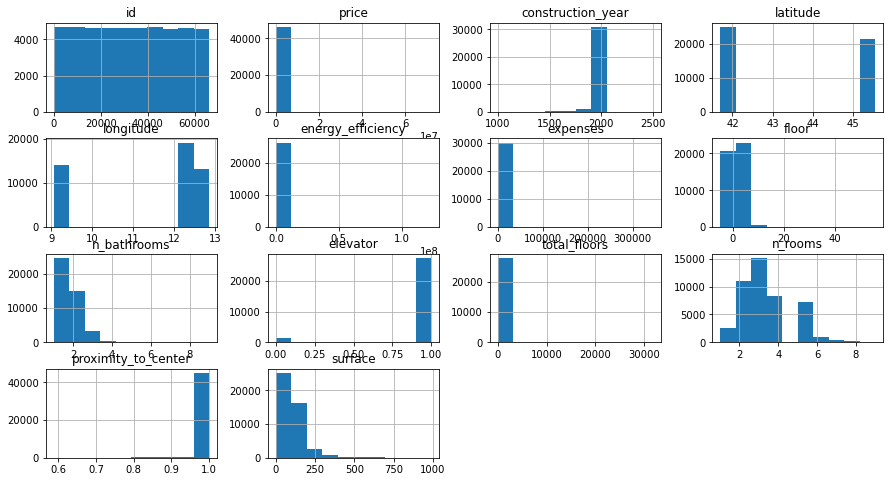

In [335]:
train.hist(figsize=(15,8))

<AxesSubplot:>

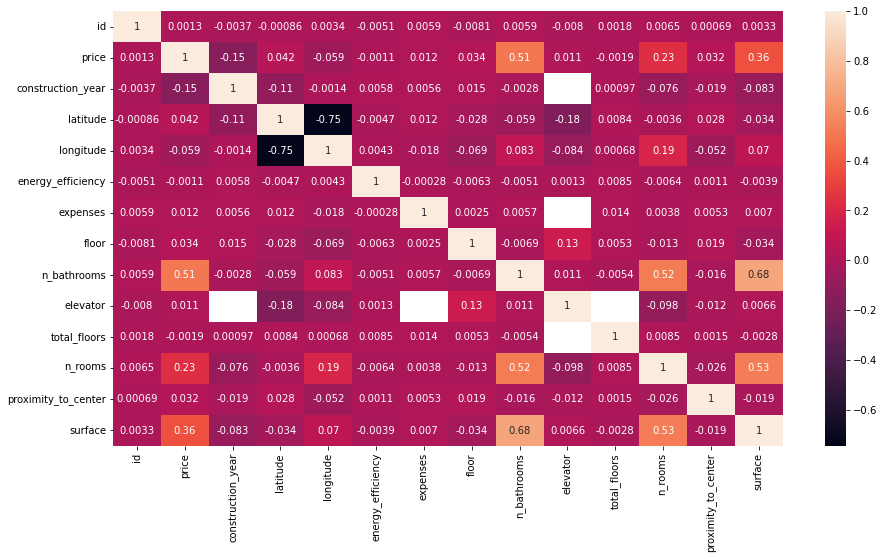

In [336]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

In [337]:
missing = train.isna().sum()
missing

id                         0
price                      0
balcony                15443
conditions              1229
construction_year      13946
latitude                  13
longitude                 13
energy_efficiency      19903
expenses               16154
floor                   2031
garden                 31529
n_bathrooms             2416
elevator               17443
total_floors           18349
n_rooms                  353
proximity_to_center       13
surface                  443
dtype: int64

# Pre-Processing

In [338]:
train= train.drop('id', axis=1)

In [339]:
# I'll try to substitute all NaN of the variables with the median or the mode depending on the variable
train['n_rooms'].fillna(train['n_rooms'].median(), inplace = True)
train['floor'].fillna(train['floor'].median(), inplace=True)
train['n_bathrooms'].fillna(train['n_bathrooms'].median(), inplace=True)
train['surface'].fillna(train['surface'].median(),inplace=True)
train['balcony'] = train['balcony'].fillna(train['balcony'].mode()[0])
train['construction_year'] = train['construction_year'].fillna(train['construction_year'].mode()[0])
train['energy_efficiency'].fillna(train['energy_efficiency'].median(),inplace=True)
train['expenses'].fillna(train['expenses'].median(),inplace=True)
train['garden'] = train['garden'].fillna(train['garden'].mode()[0])
train['elevator'] = train['elevator'].fillna(train['elevator'].mode()[0])
train['proximity_to_center'] = train['proximity_to_center'].fillna(train['proximity_to_center'].mode()[0])
train['latitude'].fillna(train['latitude'].median(),inplace=True)
train['longitude'].fillna(train['longitude'].median(),inplace=True)
train['total_floors'].fillna(train['total_floors'].median(),inplace=True)

In [340]:
# I'll substitute all the variables in surface that are 0.0 with the median since it makes no sense to have an house 
# with 0 surface.
#train['surface'] = train['surface'].replace(0, train['surface'].median())
#train['surface'] = train['surface'].replace(0, 0.1)

In [341]:
# I'll set the boolean variables as integers
train['garden'] = train['garden'].astype(int)
train['balcony'] = train['balcony'].astype(int)

In [342]:
missing = train.isna().sum()
missing

price                     0
balcony                   0
conditions             1229
construction_year         0
latitude                  0
longitude                 0
energy_efficiency         0
expenses                  0
floor                     0
garden                    0
n_bathrooms               0
elevator                  0
total_floors              0
n_rooms                   0
proximity_to_center       0
surface                   0
dtype: int64

# Outliers

In [343]:
# I'll now check for some outliers in the variables:
# I'll focus on the heaviest ones

In [344]:
# The highest building has 31906 floors, while the second highest has 135 floors, so I'll drop the first one
train=train[train['total_floors'] < train['total_floors'].sort_values().iloc[-1]]

In [345]:
# dropping just the smallest one
train=train[train['price'] > train['price'].sort_values().iloc[1]]

In [346]:
# dropping the last one since the construction year is 2500
train=train[train['construction_year'] < train['construction_year'].sort_values().iloc[-1]]

In [347]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46308 entries, 0 to 46311
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                46308 non-null  int64  
 1   balcony              46308 non-null  int32  
 2   conditions           45079 non-null  object 
 3   construction_year    46308 non-null  float64
 4   latitude             46308 non-null  float64
 5   longitude            46308 non-null  float64
 6   energy_efficiency    46308 non-null  float64
 7   expenses             46308 non-null  float64
 8   floor                46308 non-null  float64
 9   garden               46308 non-null  int32  
 10  n_bathrooms          46308 non-null  float64
 11  elevator             46308 non-null  float64
 12  total_floors         46308 non-null  float64
 13  n_rooms              46308 non-null  float64
 14  proximity_to_center  46308 non-null  float64
 15  surface              46308 non-null 

# Point of Interest

In [348]:
poi=pd.read_csv('poi.csv')

In [349]:
poi2=poi.copy()

In [350]:
poi_feature=poi2[['id_on_platform']]

In [351]:
poi_feature['lat']=poi2['lat']
poi_feature['lon']=poi2['lon']

In [352]:
# I'll now clean the poi dataset, in order to only have data that could be used as features in the train dataset
poi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397382 entries, 0 to 397381
Data columns (total 96 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id_on_platform         397382 non-null  int64  
 1   lat                    397382 non-null  float64
 2   lon                    397382 non-null  float64
 3   source                 397382 non-null  object 
 4   tags.addr:city         80929 non-null   object 
 5   tags.addr:country      32852 non-null   object 
 6   tags.addr:housenumber  104548 non-null  object 
 7   tags.addr:postcode     64669 non-null   object 
 8   tags.addr:street       97486 non-null   object 
 9   tags.alt_name:gl       1 non-null       object 
 10  tags.amenity           50459 non-null   object 
 11  tags.artwork_type      662 non-null     object 
 12  tags.barrier           42890 non-null   object 
 13  tags.bicycle           3878 non-null    object 
 14  tags.brand             4342 non-null

In [353]:
poi2 = poi2[['lat', 'lon', 'tags.amenity', 'tags.fuel:diesel', 'tags.artwork_type', 'tags.fuel:lpg', 
                          'tags.station', 'tags.fuel:octane_95', 'tags.public_transport', 'tags.railway', 'tags.subway', 
                         'tags.tourism','tags.tram', 'tags.train']]

In [354]:
pd.DataFrame(poi2['tags.amenity'].value_counts())

,tags.amenity
bench,9941
waste_basket,6367
restaurant,6159
cafe,3568
drinking_water,3029
...,...
vehicle_inspection,1
prison,1
watering_place;drinking_water,1
internet_cafe;money_transfer,1


In [355]:
poi_feature

,id_on_platform,lat,lon
0,21225803,45.460632,9.190908
1,21225957,45.460992,9.191615
2,21225987,45.462431,9.193959
3,21226001,45.460820,9.191105
4,21226174,45.468803,9.199262
...,...,...,...
397377,9844153599,46.218665,6.148755
397378,9844156332,46.222237,6.097440
397379,9844156333,46.221761,6.097105
397380,9844156334,46.225913,6.101458


In [356]:
poi_feature['culture']=(poi2['tags.amenity']=='theatre') | (poi2['tags.amenity']=='university') | (poi2['tags.amenity']=='library') | (poi2['tags.amenity']=='school') | (poi2['tags.amenity']=='college') | (poi2['tags.amenity']=='museum') | (poi2['tags.amenity']=='art_gallery')

In [357]:
poi_feature['health']=(poi2['tags.amenity']=='pharmacy') | (poi2['tags.amenity']=='doctors') | (poi2['tags.amenity']=='dentist') | (poi2['tags.amenity']=='hospital') | (poi2['tags.amenity']=='clinic')

In [358]:
poi_feature['entertainment']=(poi2['tags.amenity']=='restaurant') | (poi2['tags.amenity']=='Restaurant') | (poi2['tags.amenity']=='fast_food') | (poi2['tags.amenity']=='pub') | (poi2['tags.amenity']=='cafe')

In [359]:
poi_feature['value']=(poi2['tags.amenity']=='cinema') | (poi2['tags.amenity']=='fountain') | (poi2['tags.amenity']=='bank') | (poi2['tags.amenity']=='social_club') | (poi2['tags.amenity']=='music_school') | (poi2['tags.amenity']=='parking')

In [360]:
poi_feature

,id_on_platform,lat,lon,culture,health,entertainment,value
0,21225803,45.460632,9.190908,False,False,False,False
1,21225957,45.460992,9.191615,False,False,False,False
2,21225987,45.462431,9.193959,False,False,False,False
3,21226001,45.460820,9.191105,False,False,False,False
4,21226174,45.468803,9.199262,False,False,False,False
...,...,...,...,...,...,...,...
397377,9844153599,46.218665,6.148755,False,False,False,False
397378,9844156332,46.222237,6.097440,False,False,False,False
397379,9844156333,46.221761,6.097105,False,False,False,False
397380,9844156334,46.225913,6.101458,False,False,False,False


In [361]:
false= (poi_feature.drop(labels = ['id_on_platform','lat', 'lon'], axis = 1) == False).all(axis=1)
poi_feature.drop(poi_feature[false].index, inplace = True)

In [362]:
poi_feature.drop('id_on_platform', axis=1)

,lat,lon,culture,health,entertainment,value
58,45.471112,9.194628,True,False,False,False
60,45.465121,9.192365,False,False,False,True
61,45.465595,9.197900,False,False,True,False
63,45.459802,9.198601,False,False,False,True
84,45.466645,9.184770,True,False,False,False
...,...,...,...,...,...,...
397330,46.200432,6.131238,False,False,True,False
397331,46.200375,6.131338,False,False,True,False
397333,46.200637,6.139789,False,True,False,False
397335,46.200483,6.142525,False,False,True,False


# Feature Engineering

In [363]:
values = list(train.conditions.unique())[:-1]

In [364]:
values

['Buono stato / Abitabile',
 'Ottimo / Ristrutturato',
 'Da ristrutturare',
 'Nuovo / Nuova costruzione']

In [365]:
dummy = pd.get_dummies(train.conditions, dtype = int)
dummy

,Buono stato / Abitabile,Da ristrutturare,Nuovo / Nuova costruzione,Ottimo / Ristrutturato
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
46307,1,0,0,0
46308,0,1,0,0
46309,1,0,0,0
46310,1,0,0,0


In [366]:
train = train.join(dummy)

In [367]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46308 entries, 0 to 46311
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      46308 non-null  int64  
 1   balcony                    46308 non-null  int32  
 2   conditions                 45079 non-null  object 
 3   construction_year          46308 non-null  float64
 4   latitude                   46308 non-null  float64
 5   longitude                  46308 non-null  float64
 6   energy_efficiency          46308 non-null  float64
 7   expenses                   46308 non-null  float64
 8   floor                      46308 non-null  float64
 9   garden                     46308 non-null  int32  
 10  n_bathrooms                46308 non-null  float64
 11  elevator                   46308 non-null  float64
 12  total_floors               46308 non-null  float64
 13  n_rooms                    46308 non-null  flo

In [368]:
# Now I drop the variable conditions since I got the dummies from it
train= train.drop('conditions', axis=1)

In [369]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46308 entries, 0 to 46311
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      46308 non-null  int64  
 1   balcony                    46308 non-null  int32  
 2   construction_year          46308 non-null  float64
 3   latitude                   46308 non-null  float64
 4   longitude                  46308 non-null  float64
 5   energy_efficiency          46308 non-null  float64
 6   expenses                   46308 non-null  float64
 7   floor                      46308 non-null  float64
 8   garden                     46308 non-null  int32  
 9   n_bathrooms                46308 non-null  float64
 10  elevator                   46308 non-null  float64
 11  total_floors               46308 non-null  float64
 12  n_rooms                    46308 non-null  float64
 13  proximity_to_center        46308 non-null  flo

In [370]:
# Now I'll try to add some variables and then see the correlation with the price.

In [371]:
train['floor_relative'] = train['floor'] / train['total_floors']

In [372]:
train['garden_with_surface'] = train['garden'] / (train['surface']+1)

In [373]:
train['surface_per_rooms'] = train['surface'] / train['n_rooms']

<AxesSubplot:>

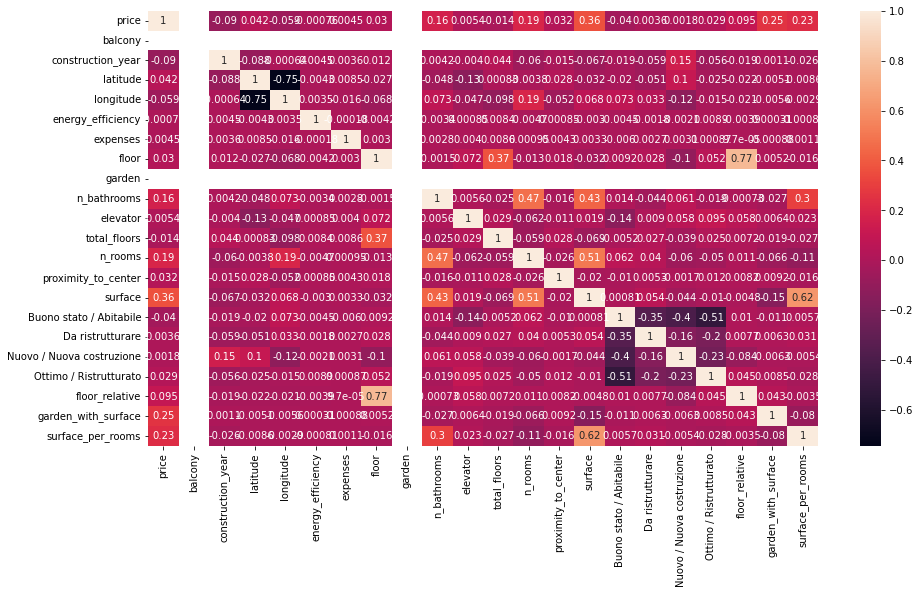

In [398]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

In [374]:
#def calcola_distanza(lat1, lon1, lat2, lon2):
#    return distance((lat1, lon1), (lat2, lon2)).km


#categorie_poi = ['culture', 'health', 'entertainment', 'value']


#for categoria in categorie_poi:
#    poi_filt = poi_feature[poi_feature[categoria]]
#    poi_filt = poi_filt[['lat', 'lon']].reset_index(drop=True)
#    poi_filt.columns = ['poi_lat', 'poi_lon']

#    distanze = train[['latitude', 'longitude']].apply(
#        lambda x: poi_filt.apply(
#            lambda y: calcola_distanza(x['latitude'], x['longitude'], y['poi_lat'], y['poi_lon']),
#            axis=1
#        ).min(),
#        axis=1
#    )

#    train[categoria + '_dist'] = np.round(distanze, 2)

# visualizza il dataset train aggiornato
#print(train.head())

# Regression

In [375]:
# Now I'll start the first regression:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X, y = train.drop('price', axis = 1), train['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [376]:
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [377]:
pred = regr.predict(X_test)

In [378]:
mean_squared_error(y_test, pred)

1439828749187.1895

In [379]:
importances = regr.feature_importances_
importances

array([0.        , 0.        , 0.02251704, 0.01662224, 0.        ,
       0.        , 0.0010689 , 0.        , 0.00093965, 0.        ,
       0.        , 0.        , 0.        , 0.20151997, 0.00120509,
       0.        , 0.        , 0.00657605, 0.13566141, 0.22744604,
       0.38644362])

In [380]:
pd.DataFrame({"col":X.columns, "importances":importances})

,col,importances
0,balcony,0.000000
1,construction_year,0.000000
2,latitude,0.022517
3,longitude,0.016622
4,energy_efficiency,0.000000
5,expenses,0.000000
6,floor,0.001069
7,garden,0.000000
8,n_bathrooms,0.000940
9,elevator,0.000000


# Grid Search

In [381]:
r=RandomForestRegressor(random_state=38)
grid ={'max_depth':[2,7,4,9,6]}
cross_valuation=KFold(n_splits=5,shuffle=True,random_state=38)
regr=GridSearchCV(r,param_grid=grid,cv=cross_valuation)
regr.fit(X_train, y_train)
pred=regr.predict(X_test)

In [382]:
pred

array([237857.19623117, 372050.90385801, 342340.22053816, ...,
       377315.0372392 , 197340.80877132, 232415.0467917 ])

In [399]:
mean_squared_error(y_test, pred)

1280905530271.1

# PCA

In [383]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
pca = PCA()
pca.fit(train_scaled)
explained_variance = pca.explained_variance_ratio_
n_components = 0
variance_sum = 0
for i in range(len(explained_variance)):
    variance_sum += explained_variance[i]
    if variance_sum >= 0.95:
        n_components = i+1
        break
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(train_scaled)

In [384]:
train_pca

array([[-1.32019988, -0.31824129,  1.67349764, ...,  0.22799111,
        -0.21625474, -0.20894973],
       [ 0.18780682,  0.39745119,  1.39910008, ..., -0.08014819,
         0.03485536,  0.71802294],
       [-1.77315975,  0.8642027 ,  1.81292054, ...,  0.03177528,
         0.0870838 , -0.53005368],
       ...,
       [ 0.17765492,  0.16155325, -1.25588201, ..., -0.43221801,
        -0.67821074, -0.38744885],
       [-1.12230217, -1.74617467, -1.21308675, ..., -0.75862364,
        -0.76556632,  0.22245215],
       [-0.24034304, -0.30781534,  0.76461469, ...,  0.18418025,
        -0.11220846,  0.55604963]])

# Test

In [385]:
test=pd.read_csv('test_updated.csv')

In [386]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19788 non-null  int64  
 1   balcony              13056 non-null  object 
 2   conditions           19277 non-null  object 
 3   construction_year    13824 non-null  float64
 4   latitude             19778 non-null  float64
 5   longitude            19778 non-null  float64
 6   energy_efficiency    11218 non-null  float64
 7   expenses             12817 non-null  float64
 8   floor                18912 non-null  float64
 9   garden               6345 non-null   object 
 10  n_bathrooms          18837 non-null  float64
 11  elevator             12333 non-null  float64
 12  total_floors         11850 non-null  float64
 13  n_rooms              19647 non-null  float64
 14  proximity_to_center  19778 non-null  float64
 15  surface              19625 non-null 

In [387]:
# I'll now adjust the Test as I did in the Train
test['n_rooms'].fillna(test['n_rooms'].median(), inplace = True)
test['floor'].fillna(test['floor'].median(), inplace=True)
test['n_bathrooms'].fillna(test['n_bathrooms'].median(), inplace=True)
test['surface'].fillna(test['surface'].median(),inplace=True)
test['balcony'] = test['balcony'].fillna(test['balcony'].mode()[0])
test['construction_year'] = test['construction_year'].fillna(test['construction_year'].mode()[0])
test['energy_efficiency'].fillna(test['energy_efficiency'].median(),inplace=True)
test['expenses'].fillna(test['expenses'].median(),inplace=True)
test['garden'] = test['garden'].fillna(test['garden'].mode()[0])
test['elevator'] = test['elevator'].fillna(test['elevator'].mode()[0])
test['proximity_to_center'] = test['proximity_to_center'].fillna(test['proximity_to_center'].mode()[0])
test['latitude'].fillna(test['latitude'].median(),inplace=True)
test['longitude'].fillna(test['longitude'].median(),inplace=True)
test['total_floors'].fillna(test['total_floors'].median(),inplace=True)

In [388]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19788 non-null  int64  
 1   balcony              19788 non-null  bool   
 2   conditions           19277 non-null  object 
 3   construction_year    19788 non-null  float64
 4   latitude             19788 non-null  float64
 5   longitude            19788 non-null  float64
 6   energy_efficiency    19788 non-null  float64
 7   expenses             19788 non-null  float64
 8   floor                19788 non-null  float64
 9   garden               19788 non-null  bool   
 10  n_bathrooms          19788 non-null  float64
 11  elevator             19788 non-null  float64
 12  total_floors         19788 non-null  float64
 13  n_rooms              19788 non-null  float64
 14  proximity_to_center  19788 non-null  float64
 15  surface              19788 non-null 

In [389]:
dummy = pd.get_dummies(test.conditions, dtype = int)
test = test.join(dummy)
test= test.drop('conditions', axis=1)

In [390]:
test['floor_relative'] = test['floor'] / test['total_floors']
test['garden_with_surface'] = test['garden'] / (test['surface']+1)
test['surface_per_rooms'] = test['surface'] / test['n_rooms']
#test=test.drop('id', axis=1)

In [391]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19788 non-null  int64  
 1   balcony                    19788 non-null  bool   
 2   construction_year          19788 non-null  float64
 3   latitude                   19788 non-null  float64
 4   longitude                  19788 non-null  float64
 5   energy_efficiency          19788 non-null  float64
 6   expenses                   19788 non-null  float64
 7   floor                      19788 non-null  float64
 8   garden                     19788 non-null  bool   
 9   n_bathrooms                19788 non-null  float64
 10  elevator                   19788 non-null  float64
 11  total_floors               19788 non-null  float64
 12  n_rooms                    19788 non-null  float64
 13  proximity_to_center        19788 non-null  flo

In [392]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46308 entries, 0 to 46311
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      46308 non-null  int64  
 1   balcony                    46308 non-null  int32  
 2   construction_year          46308 non-null  float64
 3   latitude                   46308 non-null  float64
 4   longitude                  46308 non-null  float64
 5   energy_efficiency          46308 non-null  float64
 6   expenses                   46308 non-null  float64
 7   floor                      46308 non-null  float64
 8   garden                     46308 non-null  int32  
 9   n_bathrooms                46308 non-null  float64
 10  elevator                   46308 non-null  float64
 11  total_floors               46308 non-null  float64
 12  n_rooms                    46308 non-null  float64
 13  proximity_to_center        46308 non-null  flo

# Regression

In [393]:
id_col = test['id']
test=test.drop('id', axis=1)
from sklearn import metrics
XX_test = test

In [394]:
Y_pred = regr.predict(XX_test)
output = pd.DataFrame({'id': id_col, 'price': Y_pred})
output.to_csv('output5.csv', index = False)

In [395]:
test.isna().sum()

balcony                      0
construction_year            0
latitude                     0
longitude                    0
energy_efficiency            0
expenses                     0
floor                        0
garden                       0
n_bathrooms                  0
elevator                     0
total_floors                 0
n_rooms                      0
proximity_to_center          0
surface                      0
Buono stato / Abitabile      0
Da ristrutturare             0
Nuovo / Nuova costruzione    0
Ottimo / Ristrutturato       0
floor_relative               0
garden_with_surface          0
surface_per_rooms            0
dtype: int64

In [396]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   balcony                    19788 non-null  bool   
 1   construction_year          19788 non-null  float64
 2   latitude                   19788 non-null  float64
 3   longitude                  19788 non-null  float64
 4   energy_efficiency          19788 non-null  float64
 5   expenses                   19788 non-null  float64
 6   floor                      19788 non-null  float64
 7   garden                     19788 non-null  bool   
 8   n_bathrooms                19788 non-null  float64
 9   elevator                   19788 non-null  float64
 10  total_floors               19788 non-null  float64
 11  n_rooms                    19788 non-null  float64
 12  proximity_to_center        19788 non-null  float64
 13  surface                    19788 non-null  flo

In [397]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46308 entries, 0 to 46311
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      46308 non-null  int64  
 1   balcony                    46308 non-null  int32  
 2   construction_year          46308 non-null  float64
 3   latitude                   46308 non-null  float64
 4   longitude                  46308 non-null  float64
 5   energy_efficiency          46308 non-null  float64
 6   expenses                   46308 non-null  float64
 7   floor                      46308 non-null  float64
 8   garden                     46308 non-null  int32  
 9   n_bathrooms                46308 non-null  float64
 10  elevator                   46308 non-null  float64
 11  total_floors               46308 non-null  float64
 12  n_rooms                    46308 non-null  float64
 13  proximity_to_center        46308 non-null  flo